In [ ]:
def take_genes_from_bed(name_of_bed: str):
    names = ['chr', 'start', 'stop', 'gene', 'to_drop', 'strand']
    df = pd.read_csv(name_of_bed, sep="\t",
                     header=None,
                     names=names,
                     skiprows=1)

    df = df.drop('to_drop', axis=1)
    return np.unique(df.gene.values)

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns

In [ ]:
names = ['chr', 'position', 'coverage']
names2 = ['chr', 'start', 'stop', 'gene', 'to_drop', 'strand']

name_of_bed = 'DHS-003Z.primers-150bp.bed'

depth = pd.read_csv('samtools_depth', sep="\t", names=names)
primers = pd.read_csv(name_of_bed, sep="\t",
                     header=None,
                     names=names2,
                     skiprows=1)

df2 = df2.drop('to_drop', axis=1)

In [ ]:
np.diff(take_genes_from_bed(name_of_bed), np.unique(df.gene.values))

In [ ]:
df.head()

In [ ]:
genes_bound = dict()
for gene in take_genes_from_bed(name_of_bed):
    df3 = df2[df2['gene'] == gene]
    genes_bound[gene] = (df3.iloc[0]['start'],
                         df3.iloc[len(df3)-1]['stop'])
print(genes_bound)

    

In [ ]:
def add_gene_name(df_to_add, df_from_add): # TODO OPTIMIZE
    genes = np.array(['0' * 10 for i in range(len(df_to_add))])
    for pos in range(len(df_to_add)):
        for index, row in df_from_add.iterrows():
            if (row['start'] + 1 <= df_to_add.position[pos] <= row['stop']) and\
                    (df_to_add.chr[pos] == row['chr']):
                genes[pos] = row['gene']b
                break
    return genes 

In [4]:
file_name = 'samtools_output2'
names = ["chr", "start", "end", "gene", "to_drop", "strand", "depth"]
df = pd.read_csv(file_name, sep="\t", names=names).drop("to_drop", axis=1)

In [ ]:
df.head()

In [ ]:
# df.depth.sum() / 
(df.end - df.start).sum()

In [6]:
def genes_depth():
    dct = {"genes": [], 
            "cov": []}
    
    for gene in np.unique(df.gene.values):
        dct["genes"].append(gene)
        dct["cov"].append(df[df.gene == gene].depth.sum() / 
                        (df[df.gene == gene].end - df[df.gene == gene].start).sum())
        
    return pd.DataFrame(dct)
    

In [7]:
df2 = genes_depth()

In [ ]:
df2.sort_values('cov', ascending=False)

In [8]:
df2

,genes,cov
0,ABL1,0.088663
1,ADA,0.000000
2,ANKRD26,0.026490
3,ASXL1,0.000000
4,ASXL2,0.000000
...,...,...
136,WAS,0.000000
137,WRN,0.000000
138,WT1,0.000000
139,XPO1,0.000000


In [ ]:
import pandas as pd
import numpy as np

In [116]:
file_name = 'samtools_output2'
names = ["chr", "start", "end", "gene", "to_drop", "strand", "depth"]
df = pd.read_csv(file_name, sep="\t", names=names).drop("to_drop", axis=1)

In [ ]:
df.head()

In [ ]:
# df.depth.sum() / 
(df.end - df.start).sum()

In [ ]:
def genes_depth(df):
    dct = {"gene": [], 
            "mean_cov_depth_X": []}
    
    for gene in np.unique(df.gene.values):
        dct["gene"].append(gene)
        dct["mean_cov_depth_X"].append(df[df.gene == gene].depth.sum() / 
                        (df[df.gene == gene].end - df[df.gene == gene].start).sum())
    
    result = pd.DataFrame(dct)
    
    result = result.sort_values('mean_cov_depth_X', ascending=False) \
    .reset_index() \
    .drop('index', axis=1)
    
    result["mean_cov_depth_X"] = result["mean_cov_depth_X"].apply(round)
    

    
    return result
    

In [12]:
df2 = genes_depth()

In [13]:
df2

,genes,cov
0,ABL1,0.088663
1,ADA,0.000000
2,ANKRD26,0.026490
3,ASXL1,0.000000
4,ASXL2,0.000000
...,...,...
136,WAS,0.000000
137,WRN,0.000000
138,WT1,0.000000
139,XPO1,0.000000


In [ ]:
df2 = df2.sort_values('cov', ascending=False).reset_index().drop('index', axis=1)

In [ ]:
df2['cov'] = df2['cov'].apply(round)

In [ ]:
df2.rename({"cov": "mean_cov_depth_X"}, axis=1)

In [17]:
target_regions_ = "DHS-003Z.primers-150bp.bed"
patient_ = "sorted_bashirli.bam"
save_name = patient_.split(".bam")[0]


def depth_calculation_in_target_regions(target_regions: str = target_regions_,
                                        patient: str = patient_) -> pd.DataFrame:
    command = f"samtools bedcov {target_regions} {patient}".strip().split(' ')
    temp_file = tempfile.NamedTemporaryFile()

    samtools_bedcov = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, encoding="utf-8")

    with open(temp_file.name, 'w')as temp:
        temp.write(samtools_bedcov.stdout)

    if not samtools_bedcov.stderr:
        names = ["chr", "start", "end", "gene", "to_drop", "strand", "depth"]
        df = pd.read_csv(temp_file, sep="\t", names=names).drop("to_drop", axis=1)

        return df

    raise PipelineError(f"an error occurred during the\n >>>> {' '.join(command)} <<<<\nERROR from {samtools_bedcov.stderr}")


def depth_calculation_for_genes(df):
    dct = {"gene": [],
           "mean_cov_depth_X": []}

    for gene in np.unique(df.gene.values):
        dct["gene"].append(gene)
        dct["mean_cov_depth_X"].append(df[df.gene == gene].depth.sum() /
                                       (df[df.gene == gene].end - df[df.gene == gene].start).sum())

    result = pd.DataFrame(dct)

    result = result.sort_values('mean_cov_depth_X', ascending=False) \
        .reset_index() \
        .drop('index', axis=1)

    result["mean_cov_depth_X"] = result["mean_cov_depth_X"].apply(round)

    return result


df = depth_calculation_in_target_regions()
df = depth_calculation_for_genes(df=df)

In [26]:
x = df[df.mean_cov_depth_X != 0].gene
y = df[df.mean_cov_depth_X != 0].mean_cov_depth_X

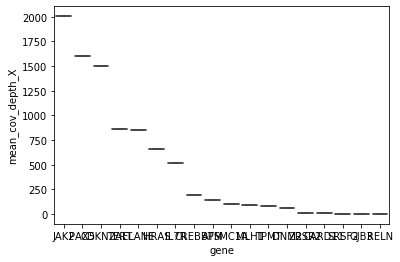

In [35]:
sns.boxplot(x, y)

In [10]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
df2

NameError: name 'df2' is not defined